# Response Themes for "Thinking back to when you first started using Jupyter Notebook, what enhancements would have made your initial experience better?"

* Goal: Extract theme keywords from `first_experience_enhancements` responses.
* Data: Output from 2_clean_survey.ipynb notebook (`survey_short_columns.csv`)
* Process from [1_ux_survey_review.ipynb](1_ux_survey_review.ipynb):

> Moving forward, here's a semi-automatic procedure we can follow for identifying themes across questions:
> 1. Take a random sample of question responses
> 2. Write down common theme keywords
> 3. Search back through the responses using the theme keywords
> 4. Expand the set of keywords with other words seen in the search results
> 5. Repeat for all themes and questions
> Later, we can use a fully automated topic modeling approach to validate our manually generated themes.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np

Make sure the samples come up the same for anyone that re-runs this.

In [4]:
rs = np.random.RandomState(123)

In [5]:
pd.set_option('max_colwidth', 1000)

In [6]:
df = pd.read_csv('survey_short_columns.csv')

In [7]:
def show(series):
    '''Make random samples easier to read.'''
    for i, value in enumerate(series):
        print('{}) {}'.format(i, value), end='\n\n')

In [8]:
responses = pd.concat([df.first_experience_enhancements_1, 
                       df.first_experience_enhancements_2, 
                       df.first_experience_enhancements_3])

In [9]:
assert len(responses) == len(df) * 3

In [10]:
responses.isnull().value_counts()

True     4591
False     527
dtype: int64

In [11]:
responses = responses.dropna()

## Initial Samples

I ran the sampling code below multiple times and manually built up the initial set of keywords seen commonly across them. I formed groups of conceptually related keywords. Then I tried to assign a simple label to each group.

In [12]:
show(responses.sample(20, random_state=rs))

0) browser interface

1) Just like vim, easy to mess things up by typing during command mode

2) More guidance about using inline visualisations (e.g. %inline matplotlib)

3) Unified documentation, more links from iPython to Jupyter stuff

4) Autosave

5) an introduction to all the extensions that are out there. I only recently stumbled on some that make the experience a lot better

6) Reveal.js integration in nbconvert

7) perhaps occasional hints on useful features

8) Better UI

9) Less stale code in Google search results, although I don't know how jupyter can do anything about 

10) better interface

11) Hotkeys being introduced in the tutorials

12) interactive visualization

13) Most recent features presented at conference not yet available in debian-available version

14) Some long running processes can stall the notebook (eg lots of print output) 

15) Better Web UI Performance over Internet

16) Interactivity

17) Easier installation

18) several kernels 

19) BETTER DOCUMENTA

In [13]:
themes = {
    'ux': ['drag', 'drag(/|&)drop', 'undo', '(double(\s|-))?click(ing)?', '(screen|width)', 
           '(better|modern) (UI|interface)', 'spell(\s|-)?check(er|ing)?', 
           '(clear|run) all', 'toggle', 
           '(style(s|sheets?)?|styling|CSS|themes?|skin|fonts?|colo(u)?rs?)',
           '(multi-|multiple\s)cells?', 'hid(e|den|ing)',
           'interface', '(reorder|move|select) cells', 'rendering', 'responsive',
           '(menu|buttons?|toolbar|tooltips?|logo|icons?)',
           '(auto)?-?sav(e|ing)|checkpoints?', 
           'stab(le|ility)|crash(es)?', 'collaborat(e|ive|ing)',],
    'documentation': ['doc(s|umentation)?($|\W)', 'tutorial(s?)', 'instructions', 'guides?', 'walk(-|\s)through',
                      'help', 'examples?', 'hints', 'demos?', 'tour', 'introduction', 'use(\s|-)case', 'roadmap',
                      'welcome', ],
    'editor': ['vim?($|\W)|emacs', '(text|code\s)?edit(or|ing)', 'diffs?($|\W)', 
               '(tab|code|auto)-?\s?complet(e|ion)', 
               '(hot)?key(\s|-)?(mappings|bindings|strokes)|short-?cuts|keyboard', 
               ],
    'development': ['debug(ging|er)?', 'namespaces?', ], 
    'content_management': ['navigat(e|ion|ing)', 'toc|table of contents', 'upload(\sfiles|notebooks)?', 
                           '(search|find)(/|&|\sand\s)replace', 'replace all', '(project|file|notebook) management',
                           'file (brows(er|ing)|explorer|navigator)', 'tagging', '(folders?|director(y|ies))', ],
    'installation': ['install(ation)?', 'set(ting)?(\s)?up', 'configur(e|ation|ing)', 'search', ],
    'integration': ['(apache\s)?spark', 'pandas', '(ana)?conda', 'sympy', 'pylab', '%?matplotlib', 'ggplot2', ],
    'language': ['(multi-?)?language', 'python', 'julia', 'R($|\W)', 'C\/C', '(more|different) kernels', 
                 '(several|multiple) kernels', ],
    'compatibility': ['compatib(le|ility)', 'versions', ],
    'visualization': ['visualization', 'widgets?', 'graphics', ],
    'version_control': ['git(hub)?', 'version control', ],
    'dissemination': ['export(ing)?', '(nb)?convert', 'slides(hows?)', 'notebook to', 'shar(e|ing)', ],
    'hosting': ['virtual(env|\senvironment)', 'cloud', 'server', 'as service', 'mybinder.org', 'docker',
                'multi(ple|-)?\s?user', 'start', 'launch(ing)?', ],
    'extensions': ['extensions?', 'plugins?', ],
    'other': ['don\'t know', 'forg(e|o)t', 'remember', 'confusing', 'terminal', ],
}

## Coverage Improvement

I next ran the code below to associate the theme labels with the responses. I then iterated on running the code below to find reponses without labels. I expanded the list of keywords and themes above in order to improve coverage.

In [14]:
import re

In [15]:
def keywords_or(text, keywords):
    for keyword in keywords:
        if re.search('(^|\W+){}'.format(keyword), text, re.IGNORECASE):
            return True
    return False

In [16]:
def tag_themes(responses, themes):
    tagged = responses.to_frame()
    tagged['themes'] = ''
    for theme, keywords in themes.items():
        results = responses.map(lambda text: keywords_or(text, keywords))
        tagged.loc[results, 'themes'] += theme + ','
        print(theme, results.sum())
    return tagged

In [17]:
tagged = tag_themes(responses, themes)
tagged.themes.str.count(',').value_counts()

extensions 15
documentation 108
ux 103
language 31
development 4
compatibility 3
dissemination 16
integration 34
content_management 32
other 21
version_control 10
installation 58
hosting 44
visualization 16
editor 58


1    351
2     82
0     82
3     10
4      2
Name: themes, dtype: int64

In [18]:
tagged[tagged.themes.str.len() == 0].sample(20, random_state=rs)

,0,themes
352,Lack of proper control over jupyter sessions / processes,
534,Breaking long lines of LaTeX output,
780,Easier timing/profiling of functions with pretty GUI line by line highlights.,
1460,Kernels' interactivity,
176,More of the customization options exposed to an UI,
561,browser support,
59,collapsible sections,
268,"minimization tools, to sort out notebooks that grew rapidly in size",
341,"tabs running, cluster, home",
1083,More clarity on autoload of modules,


## Precision Check

I then studied a sample of responses for each theme to see if there major inaccuracies in their application (e.g., string matches that are too fuzzy).

In [19]:
tagged = tag_themes(responses, themes)
tagged.themes.str.count(',').value_counts()

extensions 15
documentation 108
ux 103
language 31
development 4
compatibility 3
dissemination 16
integration 34
content_management 32
other 21
version_control 10
installation 58
hosting 44
visualization 16
editor 58


1    351
2     82
0     82
3     10
4      2
Name: themes, dtype: int64

In [20]:
from IPython.display import display, clear_output

In [21]:
# for key in themes:
#     clear_output()
#     size = min([10, len(tagged[tagged.themes.str.contains(key)])])
#     display(tagged[tagged.themes.str.contains(key)].sample(size))
#     if input('Showing `{}`. Type Enter to continue, "q" to stop.'.format(key)) == 'q':
#         break

I also looked at responses with multiple themes to fine tune them, and catch duplication of words in multiple themes.

## Keyword Frequencies

In [22]:
import matplotlib
import seaborn

In [23]:
counts = {}

In [24]:
for theme, keywords in themes.items():
    for keyword in keywords:
        hits = responses.map(lambda text: keywords_or(text, [keyword]))
        counts[keyword] = hits.sum()

In [25]:
hist = pd.Series(counts).sort_values()

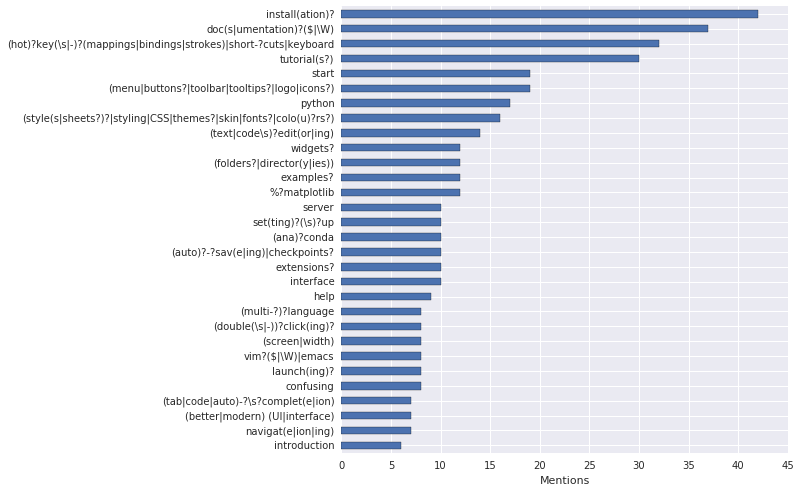

In [26]:
ax = hist[-30:].plot.barh(figsize=(8, 8))
_ = ax.set_xlabel('Mentions')

## Persist

I save off the themes and keywords to a DataFrame with the same index as the original so that the entries can be tagged.

In [27]:
column = 'first_experience_enhancements'

In [28]:
themes_df = tagged.themes.to_frame()

In [29]:
themes_df = themes_df.rename(columns={'themes' : column+'_themes'})

In [30]:
themes_df[column+'_keywords'] = ''

In [31]:
for theme, keywords in themes.items():
    for keyword in keywords:
        results = responses.map(lambda text: keywords_or(text, [keyword]))
        themes_df.loc[results, column+'_keywords'] += keyword + ','

In [32]:
themes_df[column+'_themes'] = themes_df[column+'_themes'].str.rstrip(',')
themes_df[column+'_keywords'] = themes_df[column+'_keywords'].str.rstrip(',')

Up above, I merged the three response fields for the question into one common pool which means we can have duplicate index value in the themes DataFrame. We need to squash these down and remove duplicates.

In [33]:
def union(group_df):
    '''Gets the set union of themes and keywords for a given DataFrame.'''
    themes = group_df[column+'_themes'].str.cat(sep=',')
    themes = list(set(themes.split(',')))
    themes = ','.join(theme for theme in themes if theme)
    
    keywords = group_df[column+'_keywords'].str.cat(sep=',')
    keywords = list(set(keywords.split(',')))
    keywords = ','.join(keyword for keyword in keywords if keyword)
    return pd.Series([themes, keywords], index=[column+'_themes', column+'_keywords'])

We group by the index and union the themes and keywords.

In [34]:
themes_df = themes_df.groupby(themes_df.index).apply(union)

In [35]:
themes_df.head()

,first_experience_enhancements_themes,first_experience_enhancements_keywords
1,"documentation,visualization","doc(s|umentation)?($|\W),widgets?"
6,"hosting,ux,content_management","file (brows(er|ing)|explorer|navigator),(folders?|director(y|ies)),(multi-|multiple\s)cells?,cloud,server"
7,"language,installation","set(ting)?(\s)?up,julia,python,(multi-?)?language,R($|\W)"
9,documentation,introduction
17,"installation,integration","(ana)?conda,set(ting)?(\s)?up"


The themes DataFrame should have as many rows as there are non-null responses in the original DataFrame.

In [36]:
assert len(themes_df) == len(df[[column+'_1', column+'_2', column+'_3']].dropna(how='all'))

In [37]:
themes_df.to_csv(column + '_themes.csv', sep=';')